## Part 2 - 2.1 and 2.2 together

C:\Users\Lado\AppData\Local\Temp\ipykernel_20712\1667935862.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[i] = np.dot(C, X[i, :]) + e2


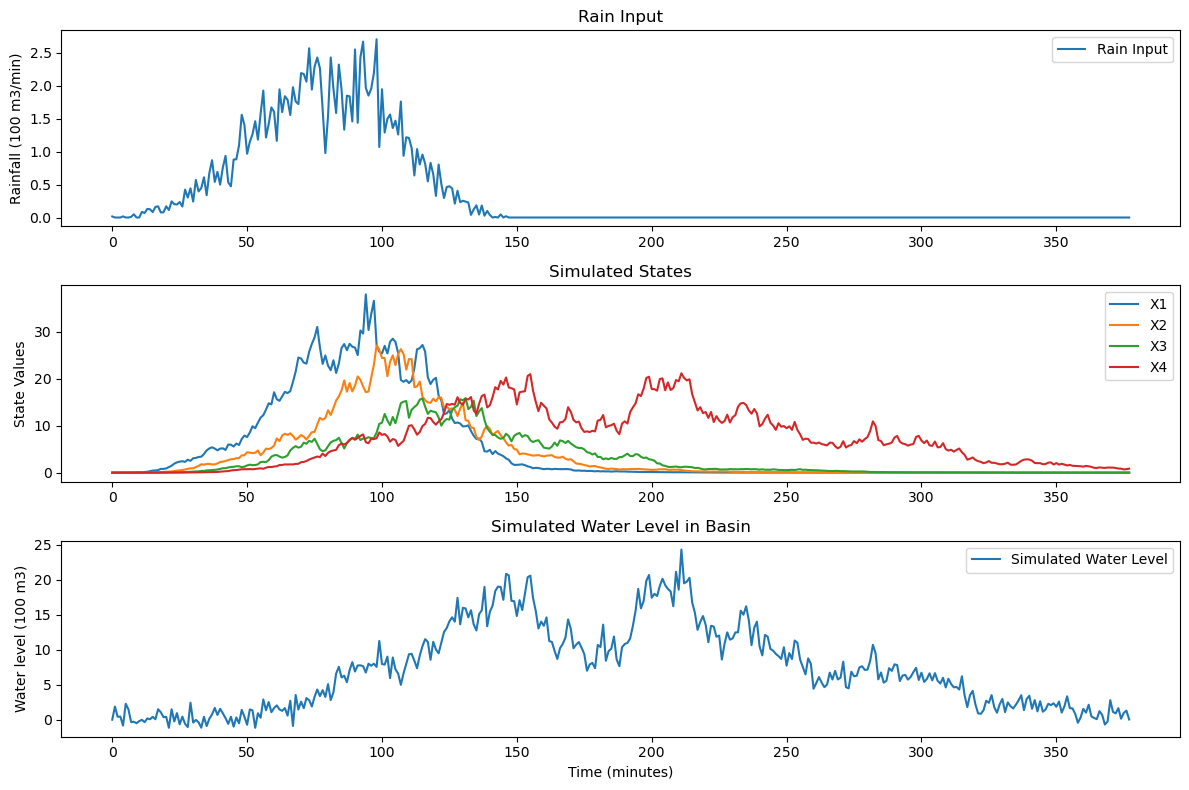

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#rain1 event data
rain_data = pd.read_csv('rain1.csv')
rain_input = rain_data.iloc[:, 1].values  # Load rain input u

#simulation parameters
np.random.seed(0)  #random seed for reproducibility
a = 0.05  #Transition rate
sigma1_sq = 0.01  #Variance of the system noise
sigma2_sq = 1  #Variance of the observation noise
p = np.sqrt(sigma1_sq)  #p for state-dependent noise scaling

#Transition matrix A
A = np.array([[1-a, 0, 0, 0],
              [a, 1-a, 0, 0],
              [0, a, 1-a, 0],
              [0, 0, a, 0.98]])

#Input matrix B
B = np.array([[1], [0], [0], [0]])
#Output matrix C
C = np.array([[0, 0, 0, 1]])
#Initial state vector
X0 = np.array([[0], [0], [0], [0]])
#N of time points to simulate
n = len(rain_input)

#in this arrays we are saving the output and states
Y = np.zeros(n)
X = np.zeros((n, 4))
#initial states
X[0, :] = X0.flatten()

#simulation generator
for i in range(1, n):
    #State-dependent noise matrix G(Xt-1)
    G = np.diag(p * np.abs(X[i-1, :]))
    #System noise
    e1 = np.dot(G, np.random.randn(4, 1)).flatten()
    #state updating
    X[i, :] = np.dot(A, X[i-1, :]) + B.flatten() * rain_input[i-1] + e1
    #observation with noise
    e2 = np.sqrt(sigma2_sq) * np.random.randn(1)
    Y[i] = np.dot(C, X[i, :]) + e2

plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(rain_input, label='Rain Input')
plt.title("Rain Input")
plt.ylabel("Rainfall (100 m3/min)")
plt.legend()

plt.subplot(312)
plt.plot(X, label=['X1', 'X2', 'X3', 'X4'])
plt.title("Simulated States")
plt.ylabel("State Values")
plt.legend()

plt.subplot(313)
plt.plot(Y, label='Simulated Water Level')
plt.title("Simulated Water Level in Basin")
plt.xlabel("Time (minutes)")
plt.ylabel("Water level (100 m3)")
plt.legend()

plt.tight_layout()
plt.show()